In [1]:
!python -V

Python 3.12.1


In [3]:
import pandas as pd
import numpy as np

In [4]:
import pickle

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
df = pd.read_parquet("green_tripdata_2021-01.parquet")

In [ ]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df["duration"] = df["duration"].apply(lambda td: td.total_seconds() / 60)
    df = df[(df['duration'] >= 1) & (df['duration'] <= 60)]
    categorical = ['PULocationID', 'DOLocationID']
    numerical = ['trip_distance']

    df[categorical] = df[categorical].astype(str)
    
    return df




In [15]:
train_dict = df[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()

X_train = dv.fit_transform(train_dict)

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
np.sqrt(mse)

np.float64(9.838799799829621)

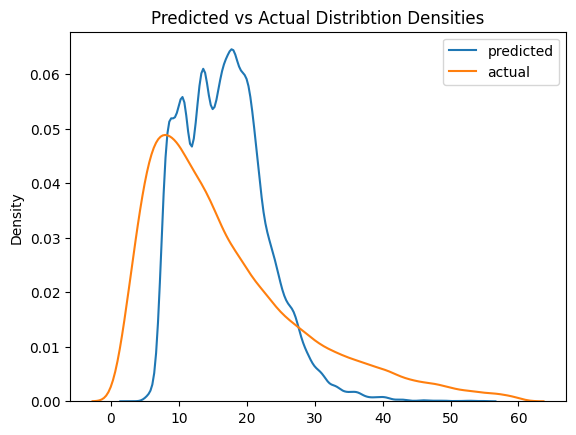

In [16]:
sns.kdeplot(y_pred, label = 'predicted')
sns.kdeplot(y_train, label='actual')
plt.title('Predicted vs Actual Distribtion Densities')
plt.legend()